In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import math

from sklearn.metrics import mean_squared_error, r2_score

# **1**
**Confirmation of co-efficient and intercept term using sklearn.linear_model LinearRegression function**



Coefficients: 
 [[-0.41267868]]
Intercept: 
 [1.02858919]


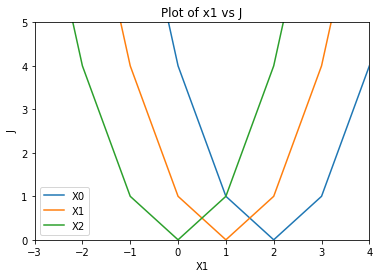

In [25]:
# Train the model 
Xmat = [[-2],[-5],[-3],[0],[-8],[-2],[1],[5],[-1],[6]]
Ymat = [[1],[-4],[1],[3],[11],[5],[0],[-1],[-3],[1]]

reg = LinearRegression().fit(Xmat, Ymat)

# The coefficients and intercept
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

X1 = np.arange(-5,5)

equ0 = (X1 + 0 - 2) ** 2
equ1 = (X1 + 1 - 2) ** 2
equ2 = (X1 + 2 - 2) ** 2

plt.xlim(-3,4)
plt.ylim(0,5)
plt.plot(X1,equ0,label='X0') 
plt.plot(X1,equ1,label='X1')        
plt.plot(X1,equ2,label='X2')  
plt.xlabel('X1')
plt.ylabel('J')
plt.title("Plot of x1 vs J")
plt.legend()

# **2**

In [41]:
def closedLinReg(filename):
    # Read in data, ignore first row (header info) and first column (index info)
    df = pd.read_csv(filename, header=None, skiprows=1)
    df = df.iloc[: , 1:] #Removes first column

    numRows = len(df)

    # Randomize the data (Gives the same data everytime)
    df = df.sample(n = numRows, random_state=0)

    # Select 2/3 of the data for training and the rest for testing
    train = df.sample(frac=0.667, random_state=0)
    test = df.drop(train.index)
    
    # Standadize the data... Make sure you retain the mean and standard deviation
    mean = np.mean(df)
    newMean = mean.iloc[:-1]
    std = np.std(df, axis=0, ddof=1)
    newStd = std.iloc[:-1]

    # Compute the solution (thetas)
    trainYVec = train.iloc[: , -1:] #Y-vector train
    trainXVec = train.iloc[: , :-1] #X-vector train
    testXVec = test.iloc[: , :-1] #X-vector test
    testYVec = test.iloc[: , -1:] #Y-vector test
    testYVec = np.array(testYVec)
    
    #Standadized train and test X vector with bias
    sTrainXVec = (trainXVec - newMean)/newStd    
    sTestXVec = (testXVec - newMean)/newStd
    sTrainXVec.insert(0,'Bias',1)
    sTestXVec.insert(0,'Bias',1)

    thetas = np.linalg.inv(sTrainXVec.T @ sTrainXVec) @ sTrainXVec.T @ trainYVec
    theta0 = thetas.iloc[0,0]   
    theta1 = thetas.iloc[1,0]    
    theta2 = thetas.iloc[2,0]

    #Change to array
    sTrainXVec = np.array(sTrainXVec)  
    sTestXVec = np.array(sTestXVec)
    thetas = np.array(thetas)
    
    
    # Apply solution to the testing sample (Find length of fishes)
#     y = theta0 + (theta1 * x1) + (theta2 * x2)
    print("final model: y = %.4f + %.4f x1 + %.4f x2" %(theta0, theta1, theta2))
    yHat = sTestXVec @ thetas

    
    # Compute RMSE
    MSE = 0
    for i in range(len(yHat)):
        temp = testYVec[i] - yHat[i]
        MSE += temp ** 2
    MSE = MSE/len(yHat)
    RMSE = math.sqrt(MSE)
    print("Final RMSE: " ,RMSE)
    print("MSE: " ,MSE)
    
#     reg = LinearRegression().fit(sTrainXVec, trainYVec)

#     # The coefficients and intercept
#     print('Coefficients: \n', reg.coef_)
#     print('Intercept: \n', reg.intercept_)
#     print('Mean squared error: %.2f' % mean_squared_error(testYVec, yHat))


closedLinReg("x06Simple.csv")




final model: y = 3057.9544 + 1203.7949 x1 + -251.2734 x2
Final RMSE:  480.95889092171547
MSE:  [231321.45475665]
Coefficients: 
 [[   0.         1203.7948535  -251.27344482]]
Intercept: 
 [3057.95443807]
Mean squared error: 231321.45



# **3**

In [21]:
def localWeighedLinReg(filename):
    # Read in data, ignore first row (header info) and first column (index info)
    df = pd.read_csv(filename, header=None, skiprows=1)
    df = df.iloc[: , 1:] #Removes first column

    numRows = len(df)

    # Randomize the data (Gives the same data everytime)
    df = df.sample(n = numRows, random_state=0)

    # Select 2/3 of the data for training and the rest for testing
    train = df.sample(frac=0.667, random_state=0)
    test = df.drop(train.index)
    
    # Standadize the data... Make sure you retain the mean and standard deviation
    mean = np.mean(df)
    newMean = mean.iloc[:-1]
    std = np.std(df, axis=0, ddof=1)
    newStd = std.iloc[:-1]

    # Compute the solution (thetas)
    trainYVec = train.iloc[: , -1:] #Y-vector train
    trainXVec = train.iloc[: , :-1] #X-vector train
    testXVec = test.iloc[: , :-1] #X-vector test
    testYVec = test.iloc[: , -1:] #Y-vector test
    testYVec = np.array(testYVec)
    
    #Standadized train and test X vector with bias
    sTrainXVec = (trainXVec - newMean)/newStd    
    sTestXVec = (testXVec - newMean)/newStd
    sTrainXVec.insert(0,'Bias',1)
    sTestXVec.insert(0,'Bias',1)
    
    #Change to array
    sTrainXVec = np.array(sTrainXVec)    
    sTestXVec = np.array(sTestXVec)
    trainYVec = np.array(trainYVec)
    testYVec = np.array(testYVec)
    
    #for each testing data, find the SE
    k = 1 
    SE = []
    for i in range(len(sTestXVec)):
        W = []
        for z in range(len(sTrainXVec)):
            dist = 0
            for j in range(1, len(sTrainXVec[0])):
                temp = sTestXVec[i][j] - sTrainXVec[z][j]
                dist += abs(temp)
            dist = dist/(k ** 2)
            newDist = math.exp(-dist)
            W.append(newDist)  
        W = np.diag(W)
        thetas = np.linalg.inv(sTrainXVec.T @ W @ sTrainXVec) @ sTrainXVec.T @ W @ trainYVec
        thetas = np.array(thetas)
        yHat = sTestXVec[i] @ thetas
        tempSE = (testYVec[i]-yHat) ** 2
        SE.append(tempSE)
    
    # Compute RMSE
    MSE = 0
    for i in range(len(testYVec)):
        MSE += SE[i]
    MSE = MSE/len(testYVec)
    RMSE = math.sqrt(MSE)
    print("Final RMSE: " ,RMSE)


localWeighedLinReg("x06Simple.csv")

Final RMSE:  349.11017950868325


# **4**

<class 'pandas.core.frame.DataFrame'>
final model: y = 3057.5362 + 1203.5993 x1 + -251.6697 x2
Final RMSE:  481.06922447708223




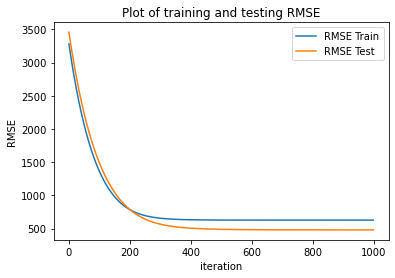

In [36]:
def gradientDescent(filename, learn_rate, num_iter):
    # Read in data, ignore first row (header info) and first column (index info)
    df = pd.read_csv(filename, header=None, skiprows=1)
    df = df.iloc[: , 1:] #Removes first column

    numRows = len(df)

    # Randomize the data (Gives the same data everytime)
    df = df.sample(n = numRows, random_state=0)

    # Select 2/3 of the data for training and the rest for testing
    train = df.sample(frac=0.667, random_state=0)
    test = df.drop(train.index)
    
    # Standadize the data... Make sure you retain the mean and standard deviation
    mean = np.mean(df)
    print(type(df))
#     print(mean)
    newMean = mean.iloc[:-1]
    std = np.std(df, axis=0, ddof=1)
    newStd = std.iloc[:-1]

    # Compute the solution (thetas)
    trainYVec = train.iloc[: , -1:] #Y-vector train
    trainXVec = train.iloc[: , :-1] #X-vector train
    testXVec = test.iloc[: , :-1] #X-vector test
    testYVec = test.iloc[: , -1:] #Y-vector test
    testYVec = np.array(testYVec)
    
    #Standadized train and test X vector with bias
    sTrainXVec = (trainXVec - newMean)/newStd    
    sTestXVec = (testXVec - newMean)/newStd
    sTrainXVec.insert(0,'Bias',1)
    sTestXVec.insert(0,'Bias',1)
    
    #Change to array
    sTrainXVec = np.array(sTrainXVec)    
    sTestXVec = np.array(sTestXVec)
    trainYVec = np.array(trainYVec)
    testYVec = np.array(testYVec)
    
    #Initialize the parameters of theta using random values in the range [-1,1]
    theta = np.random.uniform(low=-1, high=1,size=len(sTrainXVec[0])).reshape((len(sTrainXVec[0]),1))
#     theta = [ [0.821656240], [0.96298259], [-0.55737087]]
    RMSETrainAr = []
    RMSETestAr = []
    finalNumIter = 0

#     terminate when abs val in percent chage in RMSE on the training data is < 2^-23 or num_iter iterations
    for i in range(num_iter):
        finalNumIter += 1
        rhs = (sTrainXVec.T @ ((sTrainXVec @ theta) - trainYVec))/len(sTrainXVec)
        theta = theta - (learn_rate * rhs)
        yHat = sTrainXVec @ theta
        yHatTest = sTestXVec @ theta
        tempSE = (trainYVec - yHat) ** 2
        tempSETest = (testYVec- yHatTest) ** 2
        MSE = 0
        MSETest = 0
        
        #for test
        for j in range(len(tempSETest)):
            MSETest += tempSETest[j]
        MSETest = MSETest/len(tempSETest)
        RMSETest = math.sqrt(MSETest)
        
        #for train
        for k in range(len(tempSE)):
            MSE += tempSE[k]
        MSE = MSE/len(tempSE)
        RMSETrain = math.sqrt(MSE)
        
        
        RMSETrainAr.append(RMSETrain)
        RMSETestAr.append(RMSETest)
        #if need to stop for RMSE train percent change less than 2^-23
        if i < 2:
            #For empty RMSETrainAr
            continue
        else:
            trainLen = len(RMSETrainAr)
            diff = RMSETrainAr[trainLen-1] - RMSETrainAr[trainLen-2] #new - old
            incr = abs((diff/RMSETrainAr[trainLen-2]) * 100)
            compr = 2 ** -23
            if incr < compr:
                break
  
    #Final thetas
    print("final model: y = %.4f + %.4f x1 + %.4f x2" %(theta[0], theta[1], theta[2]))
    
    #RMSE of the testing data
    print("Final RMSE: " ,RMSETestAr[len(RMSETestAr)-1])
    print("\n")

    # create some x data and some integers for the y axis
    y = np.arange(finalNumIter)

    # plot the data
    plt.plot(y,RMSETrainAr,label='RMSE Train')        
    plt.plot(y,RMSETestAr, label="RMSE Test")    
    plt.xlabel('iteration')
    plt.ylabel('RMSE')
    plt.title("Plot of training and testing RMSE")
    plt.legend()
gradientDescent("x06Simple.csv", 0.01, 1000)